In [11]:
import csv
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pylab
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt 
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore") # specify to ignore warning messages

path = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_Resedential.csv"
path1 = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_predicted_reduction.csv"
path2 = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_predicted_incbld.csv"
path3 = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_predicted_incbld_cursoln.csv"
path4 = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_predicted_incbld_newsoln_oldbuild.csv"
path5 = "C:/Users/alice/OneDrive - The City College of New York/Fall 2021/Senior Project 2/Project/Global_predicted_incbld_newsoln.csv"



In [2]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')


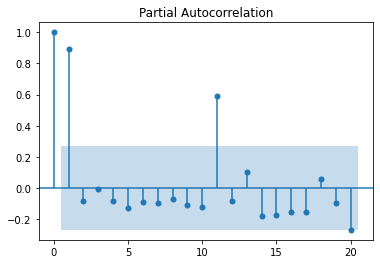

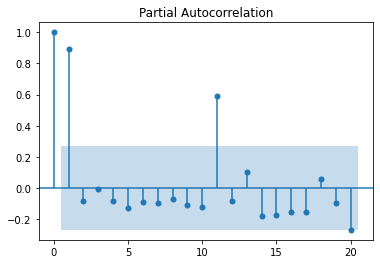

In [3]:
plot_pacf(mte, lags=20)
#q value is 3

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

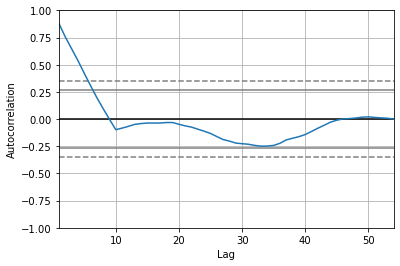

In [4]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be 5, 6 or 7

<AxesSubplot:ylabel='Density'>

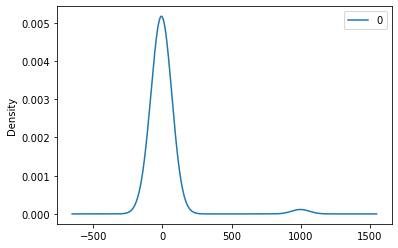

In [5]:
trymod = ARIMA(mte, order=(6,1,1))
trymod_fit = trymod.fit()
resd = DataFrame(trymod_fit.resid)
resd.plot(kind = 'kde')

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   54
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -306.545
Date:                Thu, 02 Dec 2021   AIC                            629.090
Time:                        15:06:12   BIC                            644.059
Sample:                    12-31-1961   HQIC                           634.747
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4806      7.667     -0.063      0.950     -15.508      14.547
ar.L2          0.2168      6.369      0.034      0.973     -12.267      12.701
ar.L3         -0.0406      0.827     -0.049      0.9

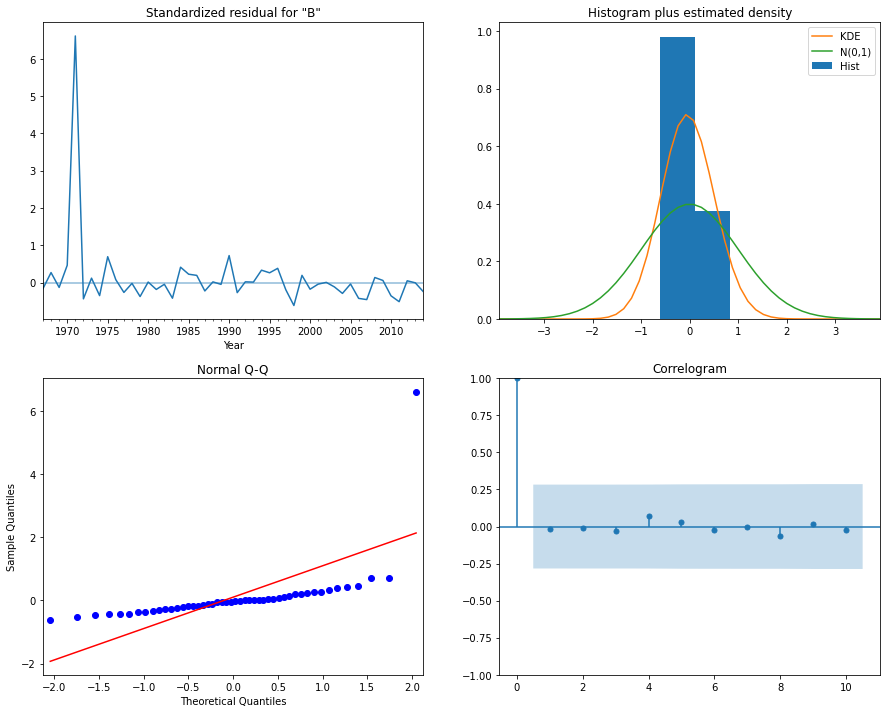

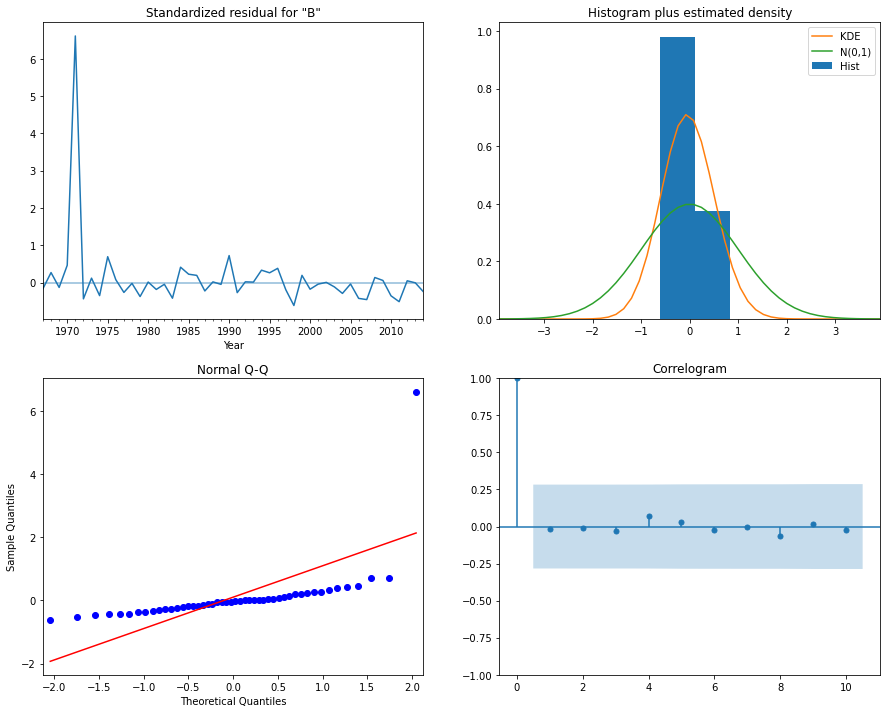

In [6]:
mod = sm.tsa.arima.ARIMA(mte, order=(5,1,2), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

In [7]:
print(mte)

        Buildings
Year             
1961  2971.488798
1962  2987.703389
1963  3031.194847
1964  2978.704323
1965  2982.601493
1966  2949.597886
1967  2961.520953
1968  2963.958464
1969  2976.268915
1970  3021.490850
1971  4036.378533
1972  4008.017343
1973  3943.644933
1974  3902.971359
1975  3946.251480
1976  3930.174491
1977  3892.019004
1978  3882.370369
1979  3837.645787
1980  3826.475310
1981  3816.655612
1982  3801.128259
1983  3753.655677
1984  3801.328097
1985  3857.792706
1986  3874.152730
1987  3855.197173
1988  3842.413480
1989  3844.116283
1990  3934.812836
1991  3921.409967
1992  3896.181080
1993  3918.748490
1994  3948.334138
1995  4001.013425
1996  4046.634864
1997  4033.000183
1998  3924.202571
1999  3948.469721
2000  3929.245188
2001  3915.028968
2002  3926.186866
2003  3912.802979
2004  3869.880325
2005  3862.875582
2006  3808.747595
2007  3733.722216
2008  3757.305269
2009  3776.813463
2010  3727.370894
2011  3653.929401
2012  3658.908859
2013  3667.357862
2014  3630

      lower Buildings  upper Buildings
2001      3643.815578      4196.963346
2002      3648.455176      4201.405134
2003      3652.166010      4204.928397
2004      3634.004074      4186.588353
2005      3591.461418      4143.876355
2001    3920.389462
2002    3924.930155
2003    3928.547204
2004    3910.296214
2005    3867.668887
2006    3867.925770
2007    3797.461223
2008    3737.672457
2009    3768.346399
2010    3776.870953
2011    3725.425945
2012    3651.669240
2013    3667.775069
2014    3664.642861
2015    3633.165539
2016    3639.759638
2017    3638.089455
2018    3640.564287
2019    3641.443607
2020    3641.242235
2021    3640.979049
2022    3641.085286
2023    3640.776124
2024    3640.897841
2025    3640.790141
2026    3640.897758
2027    3640.818038
2028    3640.904003
2029    3640.834778
2030    3640.895129
2031    3640.841680
Freq: A-DEC, Name: predicted_mean, dtype: float64


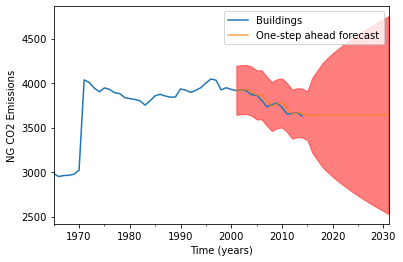

In [8]:
pred = results.get_prediction(start = 40, end = 70, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['1965':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is 1476.38
The Root Mean Square Error (RMSE) of the forcast: nan
2001    3920.389462
2002    3924.930155
2003    3928.547204
2004    3910.296214
2005    3867.668887
2006    3867.925770
2007    3797.461223
2008    3737.672457
2009    3768.346399
2010    3776.870953
2011    3725.425945
2012    3651.669240
2013    3667.775069
2014    3664.642861
2015    3633.165539
2016    3639.759638
2017    3638.089455
2018    3640.564287
2019    3641.443607
2020    3641.242235
2021    3640.979049
2022    3641.085286
2023    3640.776124
2024    3640.897841
2025    3640.790141
2026    3640.897758
2027    3640.818038
2028    3640.904003
2029    3640.834778
2030    3640.895129
2031    3640.841680
Freq: A-DEC, Name: predicted_mean, dtype: float64


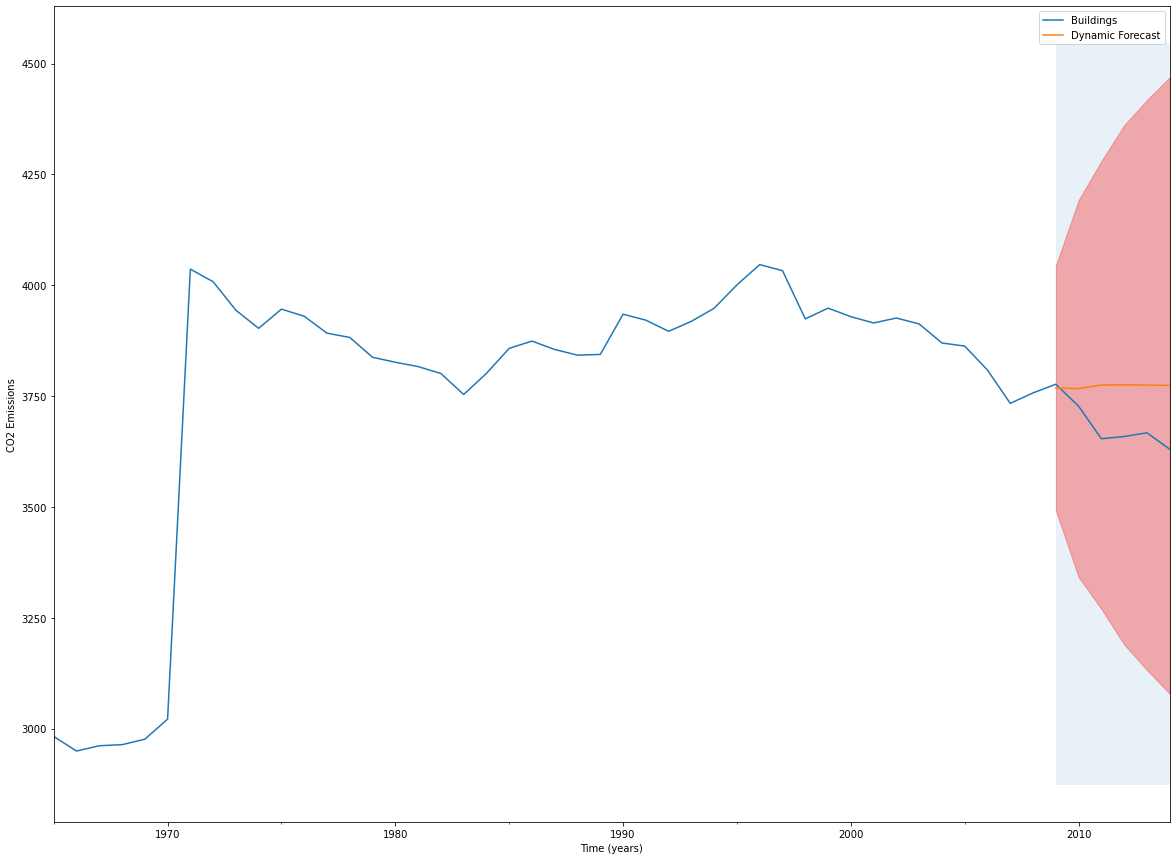

In [9]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2009':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2009'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['1965':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2009'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 10362.0
The Root Mean Square Error (RMSE) of the forcast: 101.7939
      lower Buildings  upper Buildings
2015      3357.620866      3908.710212
2016      3214.606371      4064.912904
2017      3133.035755      4143.143154
2018      3054.922266      4226.206308
2019      2998.803540      4284.083673


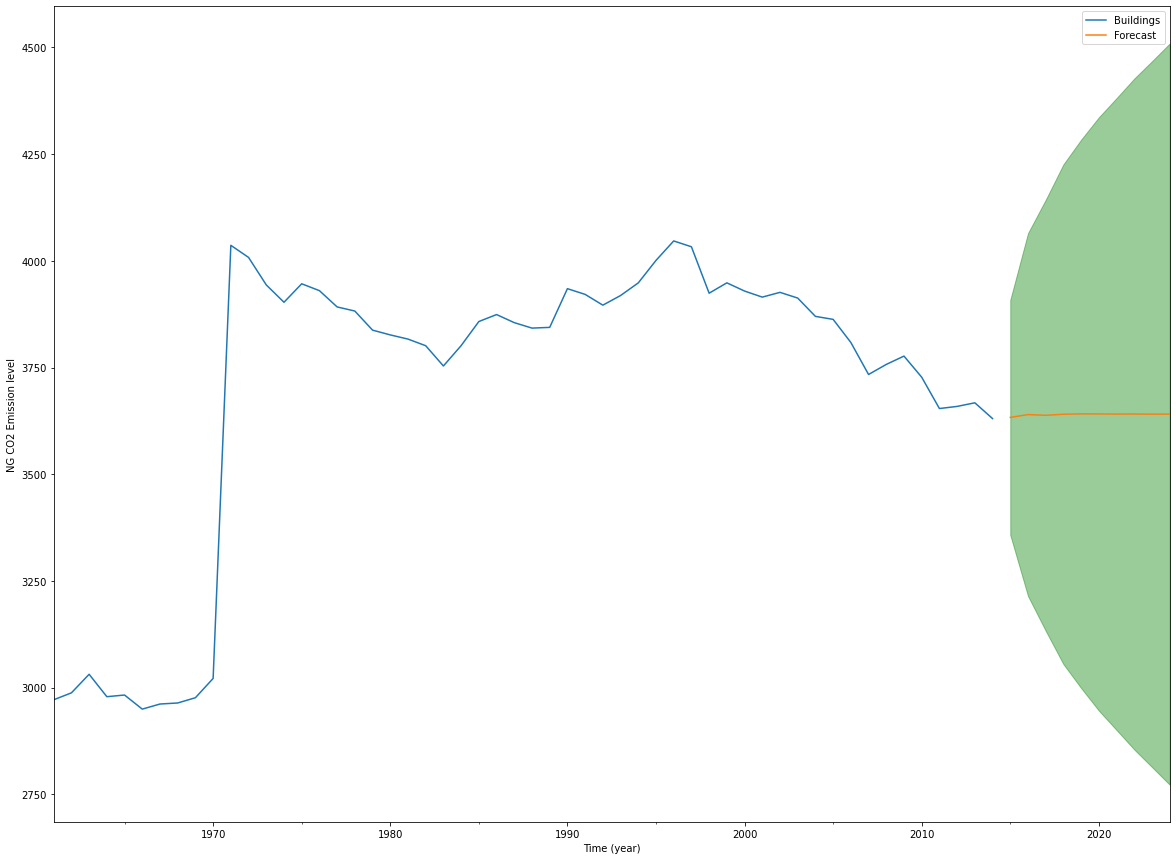

2015    3633.165539
2016    3639.759638
2017    3638.089455
2018    3640.564287
2019    3641.443607
2020    3641.242235
2021    3640.979049
2022    3641.085286
2023    3640.776124
2024    3640.897841
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [10]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2009':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=10)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)

In [13]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path1, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')


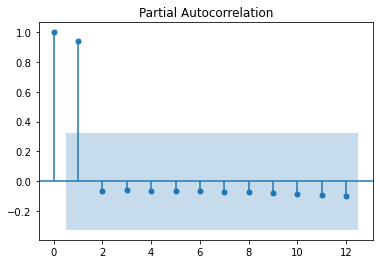

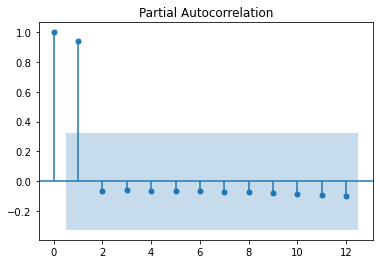

In [16]:
plot_pacf(mte, lags=12)
#q value is 2

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

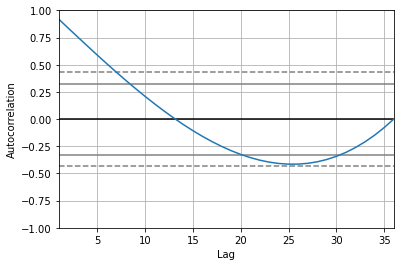

In [17]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be 6 or 7

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   36
Model:                 ARIMA(6, 1, 2)   Log Likelihood                  84.285
Date:                Thu, 02 Dec 2021   AIC                           -150.571
Time:                        15:38:19   BIC                           -138.265
Sample:                    12-31-2015   HQIC                          -146.717
                         - 12-31-2050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3974      0.130      3.049      0.002       0.142       0.653
ar.L2          0.6813      0.049     13.915      0.000       0.585       0.777
ar.L3         -0.1012      0.105     -0.961      0.3

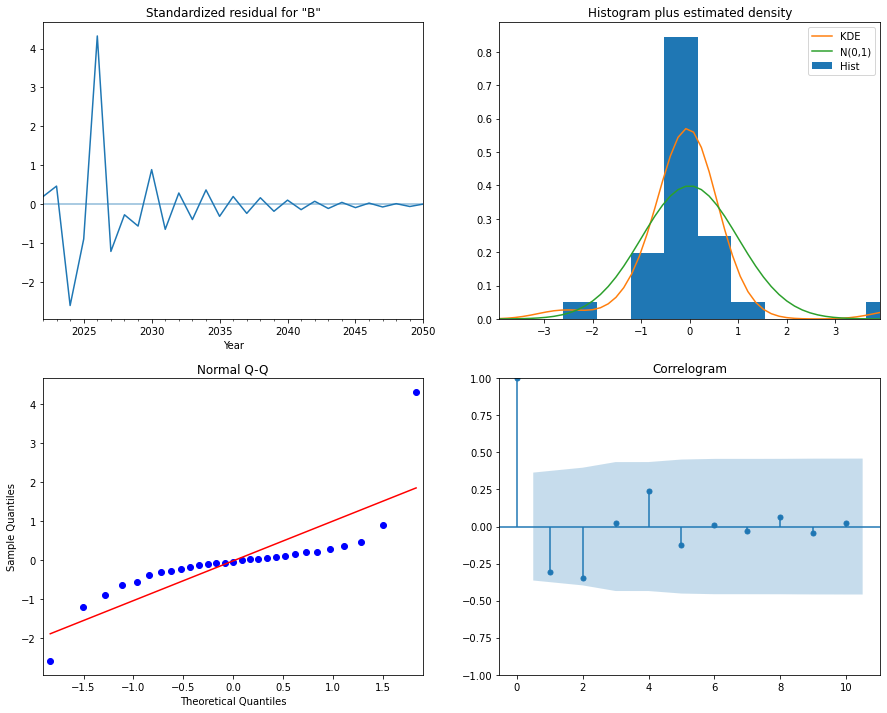

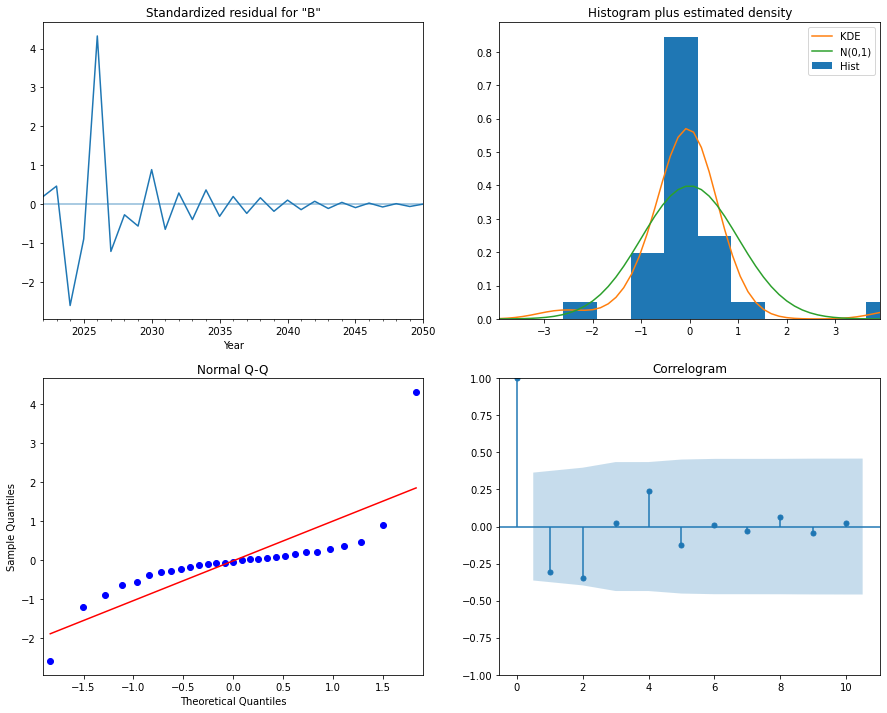

In [23]:
mod = sm.tsa.arima.ARIMA(mte, order=(6,1,2), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

      lower Buildings  upper Buildings
2045      2512.170535      2512.220934
2046      2475.765032      2475.815432
2047      2439.353668      2439.404068
2048      2402.947351      2402.997751
2049      2366.536688      2366.587087
2045    2512.195735
2046    2475.790232
2047    2439.378868
2048    2402.972551
2049    2366.561887
2050    2330.154960
2051    2293.744822
2052    2257.338340
2053    2220.929484
2054    2184.523050
2055    2148.115186
2056    2111.708973
2057    2075.301931
2058    2038.896047
2059    2002.489733
2060    1966.084261
2061    1929.678614
2062    1893.273605
2063    1856.868583
2064    1820.464070
2065    1784.059647
2066    1747.655650
2067    1711.251811
2068    1674.848343
2069    1638.445076
2070    1602.042146
2071    1565.639444
2072    1529.237058
2073    1492.834917
2074    1456.433078
2075    1420.031496
2076    1383.630206
2077    1347.229180
2078    1310.828440
2079    1274.427969
2080    1238.027782
2081    1201.627865
2082    1165.228230
2083  

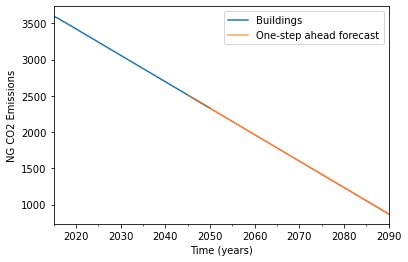

In [29]:
pred = results.get_prediction(start = 30, end = 75, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is nan
The Root Mean Square Error (RMSE) of the forcast: nan
2055    2148.115186
2056    2111.708973
2057    2075.301931
2058    2038.896047
2059    2002.489733
2060    1966.084261
2061    1929.678614
2062    1893.273605
2063    1856.868583
2064    1820.464070
2065    1784.059647
2066    1747.655650
2067    1711.251811
2068    1674.848343
2069    1638.445076
2070    1602.042146
2071    1565.639444
2072    1529.237058
2073    1492.834917
2074    1456.433078
2075    1420.031496
2076    1383.630206
2077    1347.229180
2078    1310.828440
2079    1274.427969
2080    1238.027782
2081    1201.627865
2082    1165.228230
2083    1128.828867
2084    1092.429784
2085    1056.030976
Freq: A-DEC, Name: predicted_mean, dtype: float64


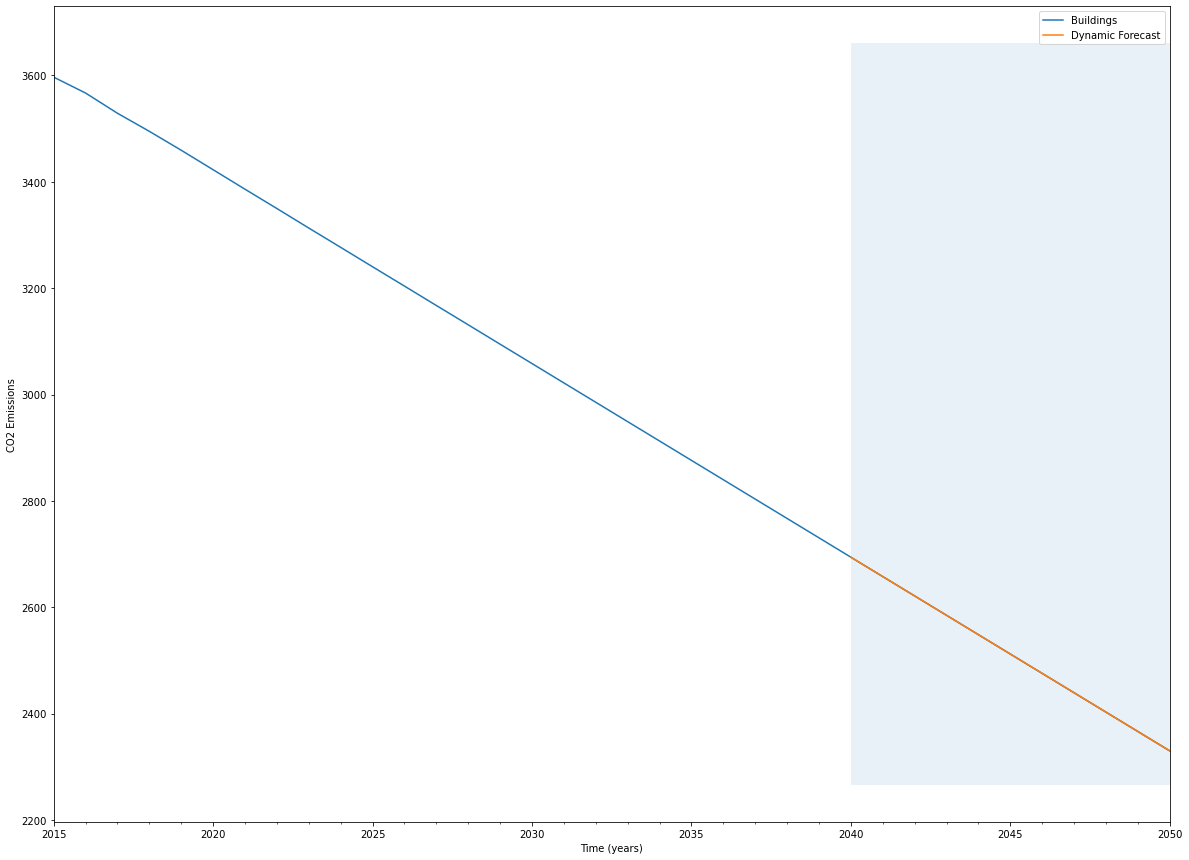

In [27]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2040'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2040'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: 0.0044
      lower Buildings  upper Buildings
2051      2293.719622      2293.770022
2052      2257.295544      2257.381137
2053      2220.851084      2221.007883
2054      2184.409680      2184.636420
2055      2147.958796      2148.271576


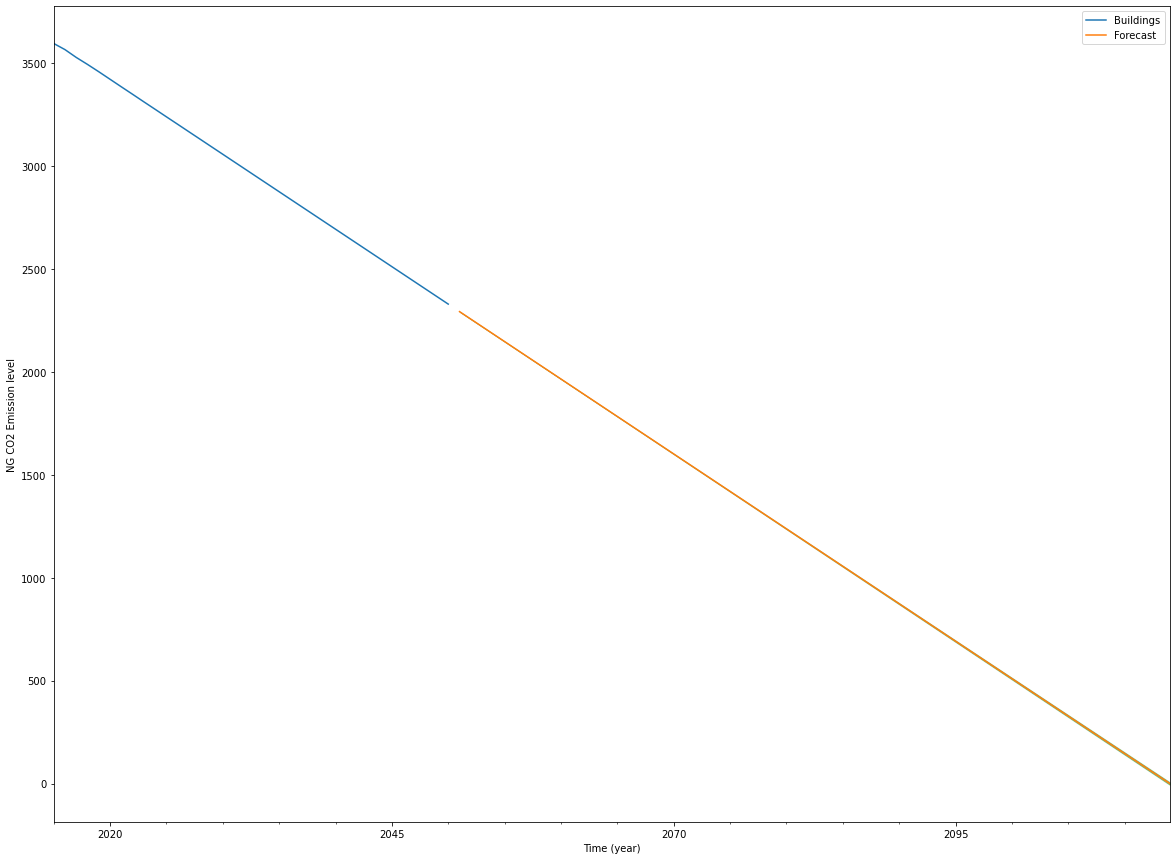

2051    2293.744822
2052    2257.338340
2053    2220.929484
2054    2184.523050
2055    2148.115186
           ...     
2110     146.150668
2111     109.759051
2112      73.367710
2113      36.976646
2114       0.585859
Freq: A-DEC, Name: predicted_mean, Length: 64, dtype: float64


In [32]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=64)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)

In [33]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path2, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')

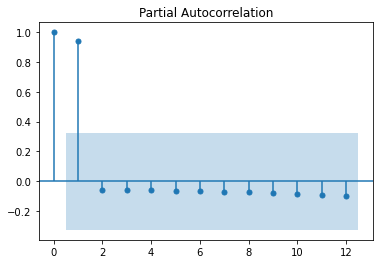

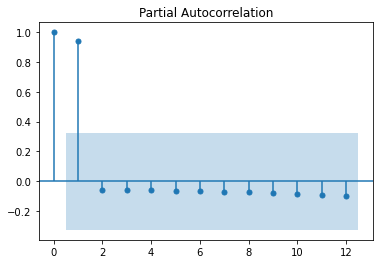

In [34]:
plot_pacf(mte, lags=12)
#q value is 2

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

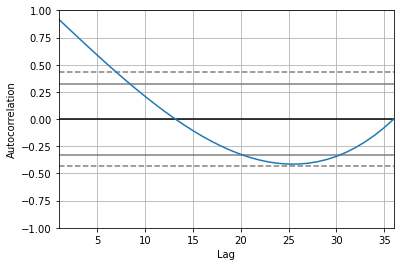

In [35]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be 6 or 7

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   36
Model:                 ARIMA(6, 1, 2)   Log Likelihood                 120.087
Date:                Thu, 02 Dec 2021   AIC                           -222.175
Time:                        15:47:00   BIC                           -209.869
Sample:                    12-31-2015   HQIC                          -218.321
                         - 12-31-2050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1722      0.586      0.294      0.769      -0.977       1.322
ar.L2          0.6222      0.346      1.799      0.072      -0.056       1.300
ar.L3          0.0070      0.398      0.018      0.9

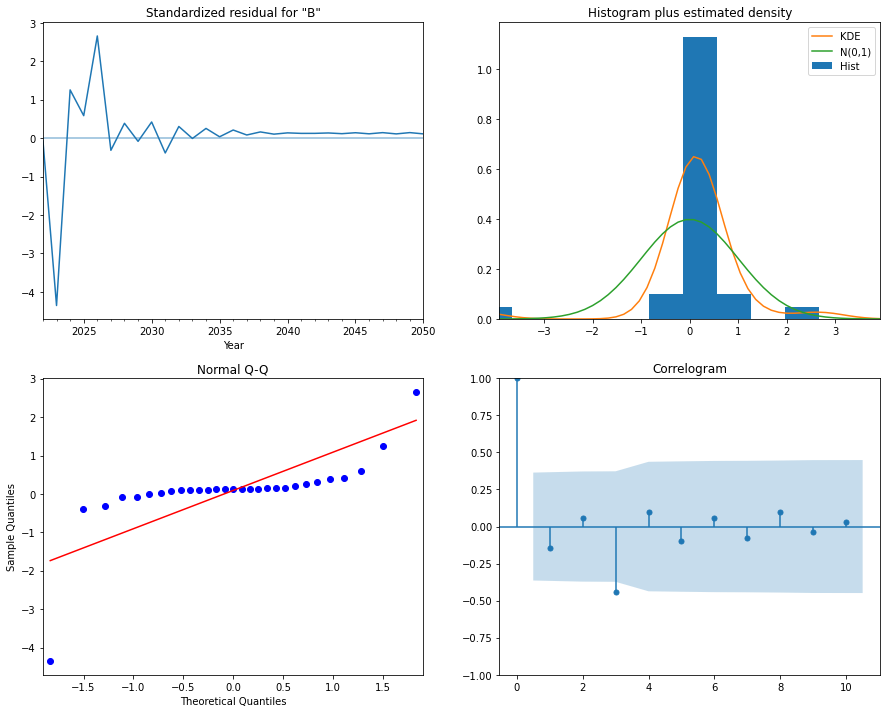

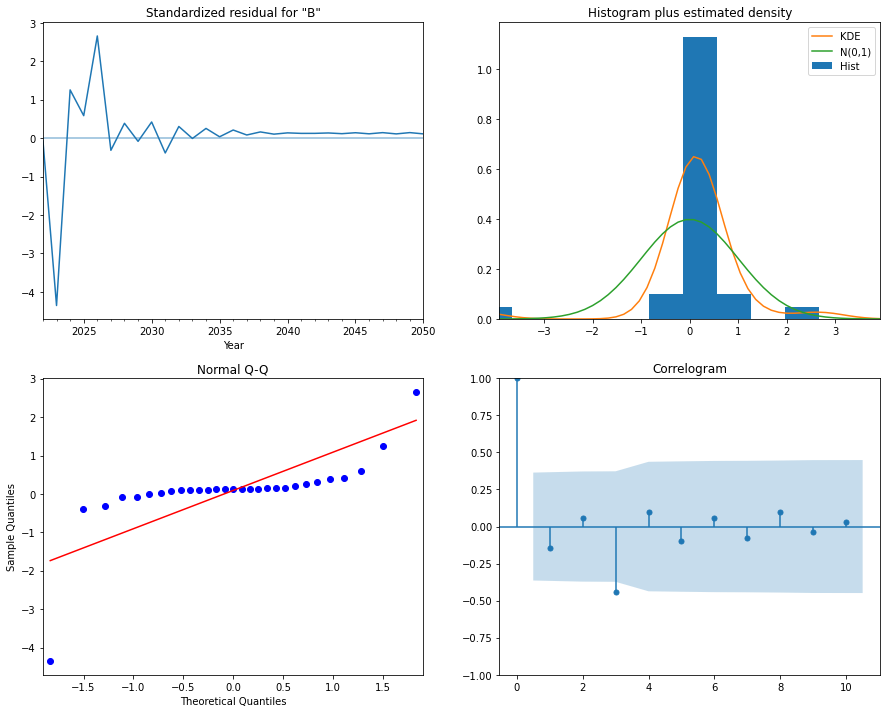

In [36]:
mod = sm.tsa.arima.ARIMA(mte, order=(6,1,2), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

      lower Buildings  upper Buildings
2045      5514.269384      5514.284408
2046      5574.954134      5574.969158
2047      5635.631909      5635.646933
2048      5696.315997      5696.331021
2049      5756.994378      5757.009402
2045    5514.276896
2046    5574.961646
2047    5635.639421
2048    5696.323509
2049    5757.001890
2050    5817.685421
2051    5878.364309
2052    5939.046699
2053    5999.724922
2054    6060.406323
2055    6121.084320
2056    6181.764896
2057    6242.442609
2058    6303.122395
2059    6363.799769
2060    6424.478796
2061    6485.155792
2062    6545.834101
2063    6606.510689
2064    6667.188308
2065    6727.864462
2066    6788.541415
2067    6849.217113
2068    6909.893419
2069    6970.568643
2070    7031.244318
2071    7091.919054
2072    7152.594112
2073    7213.268348
2074    7273.942799
2075    7334.616525
2076    7395.290379
2077    7455.963586
2078    7516.636850
2079    7577.309532
2080    7637.982212
2081    7698.654364
2082    7759.326464
2083  

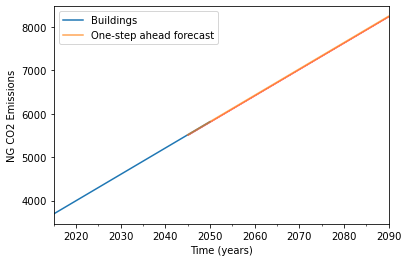

In [37]:
pred = results.get_prediction(start = 30, end = 75, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: nan
2045    5514.276896
2046    5574.961646
2047    5635.639421
2048    5696.323509
2049    5757.001890
2050    5817.685421
2051    5878.364309
2052    5939.046699
2053    5999.724922
2054    6060.406323
2055    6121.084320
2056    6181.764896
2057    6242.442609
2058    6303.122395
2059    6363.799769
2060    6424.478796
2061    6485.155792
2062    6545.834101
2063    6606.510689
2064    6667.188308
2065    6727.864462
2066    6788.541415
2067    6849.217113
2068    6909.893419
2069    6970.568643
2070    7031.244318
2071    7091.919054
2072    7152.594112
2073    7213.268348
2074    7273.942799
2075    7334.616525
2076    7395.290379
2077    7455.963586
2078    7516.636850
2079    7577.309532
2080    7637.982212
2081    7698.654364
2082    7759.326464
2083    7819.998081
2084    7880.669607
2085    7941.340685
2086    8002.011639
2087    8062.682175
2088    8123.352560
2089    8184.0

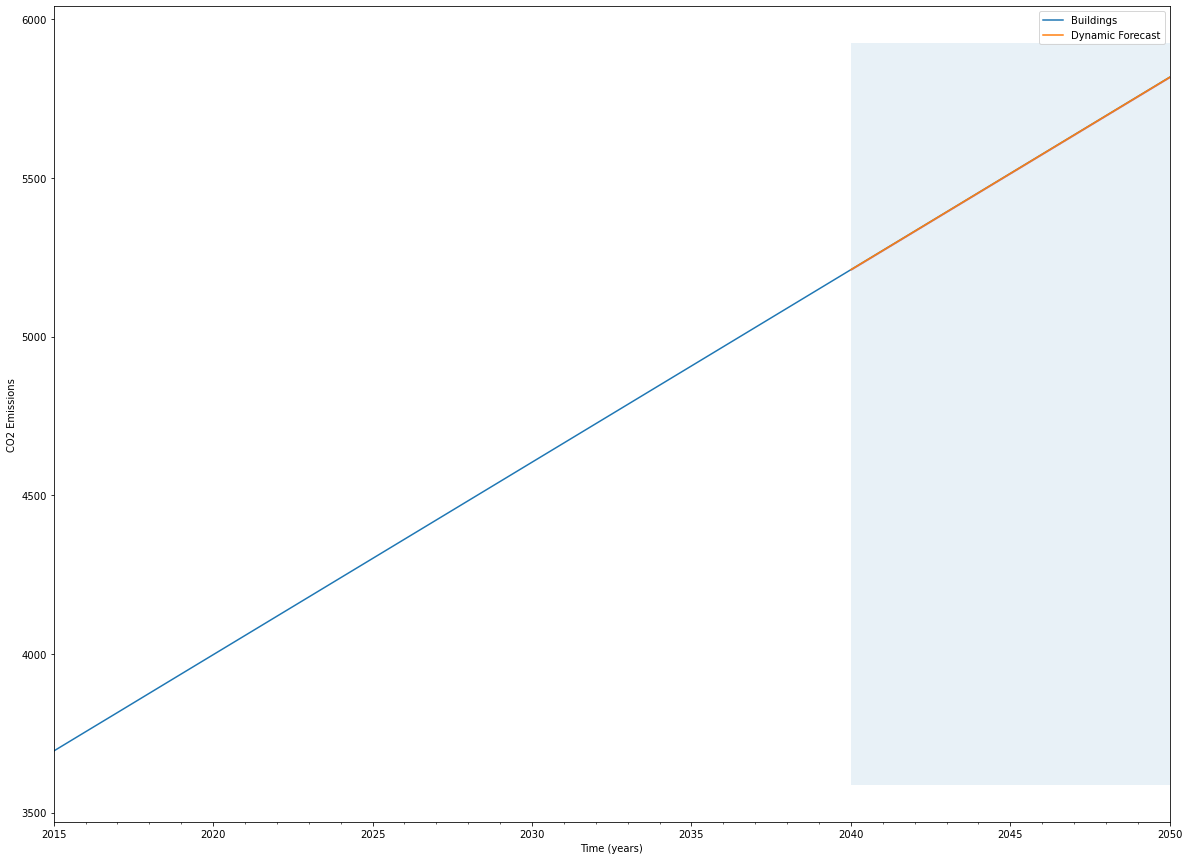

In [38]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2040'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2040'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: 0.0106
      lower Buildings  upper Buildings
2051      5878.356797      5878.371821
2052      5939.034749      5939.058648
2053      5999.704254      5999.745589
2054      6060.378028      6060.434619
2055      6121.046446      6121.122194


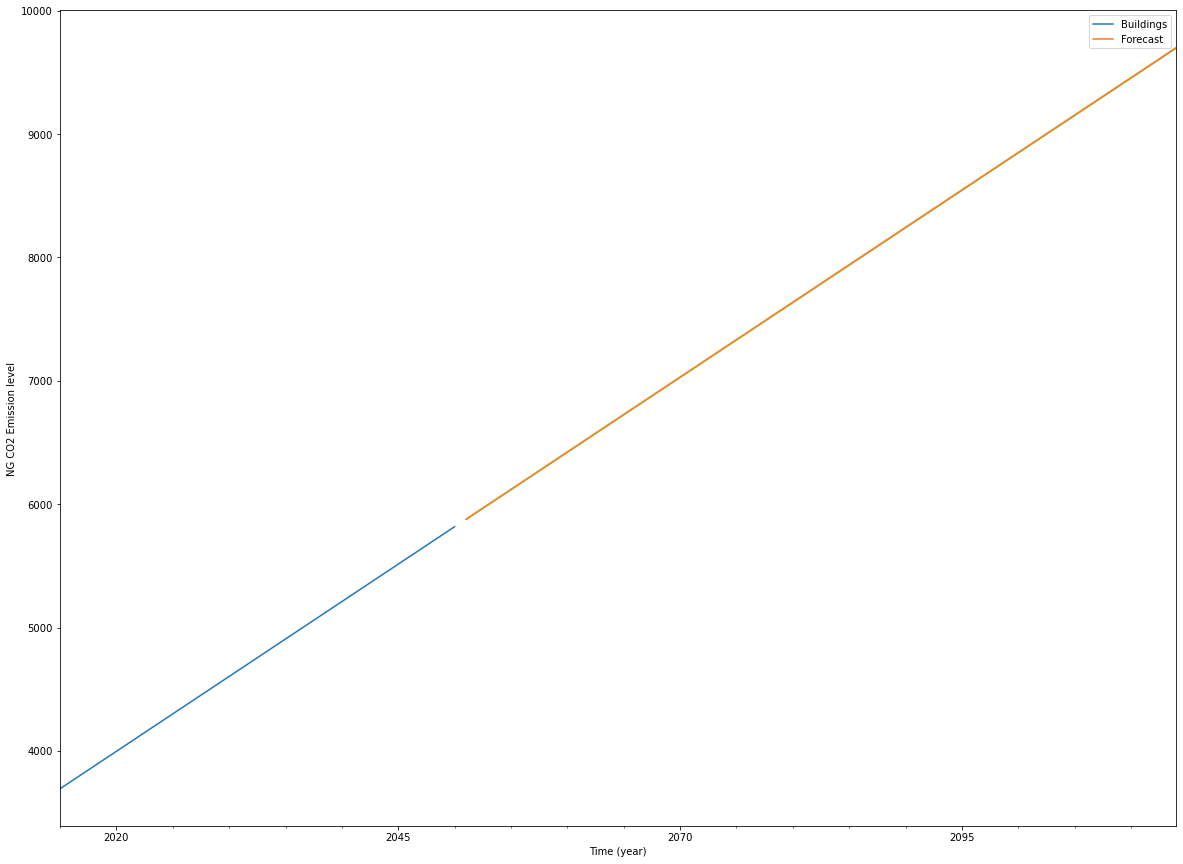

2051    5878.364309
2052    5939.046699
2053    5999.724922
2054    6060.406323
2055    6121.084320
           ...     
2110    9458.029359
2111    9518.693284
2112    9579.356944
2113    9640.020315
2114    9700.683418
Freq: A-DEC, Name: predicted_mean, Length: 64, dtype: float64


In [39]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=64)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)

In [40]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path3, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')

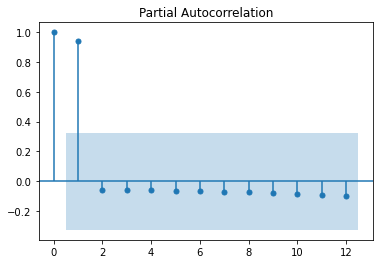

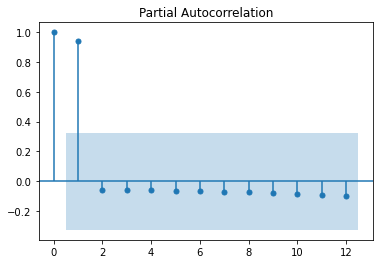

In [41]:
plot_pacf(mte, lags=12)
#q value is 2

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

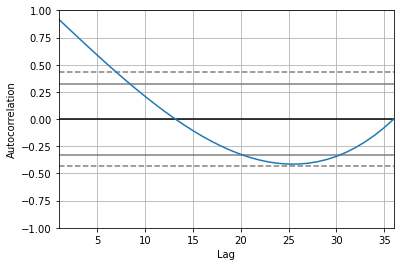

In [42]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be7 or 8

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   36
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -430.608
Date:                Thu, 02 Dec 2021   AIC                            879.217
Time:                        15:50:03   BIC                            891.206
Sample:                    12-31-2015   HQIC                           882.882
                         - 12-31-2050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1314      0.000    729.228      0.000       0.131       0.132
ar.L2          0.8908      0.000   3012.734      0.000       0.890       0.891
ar.L3         -0.0392      0.000   -115.280      0.0

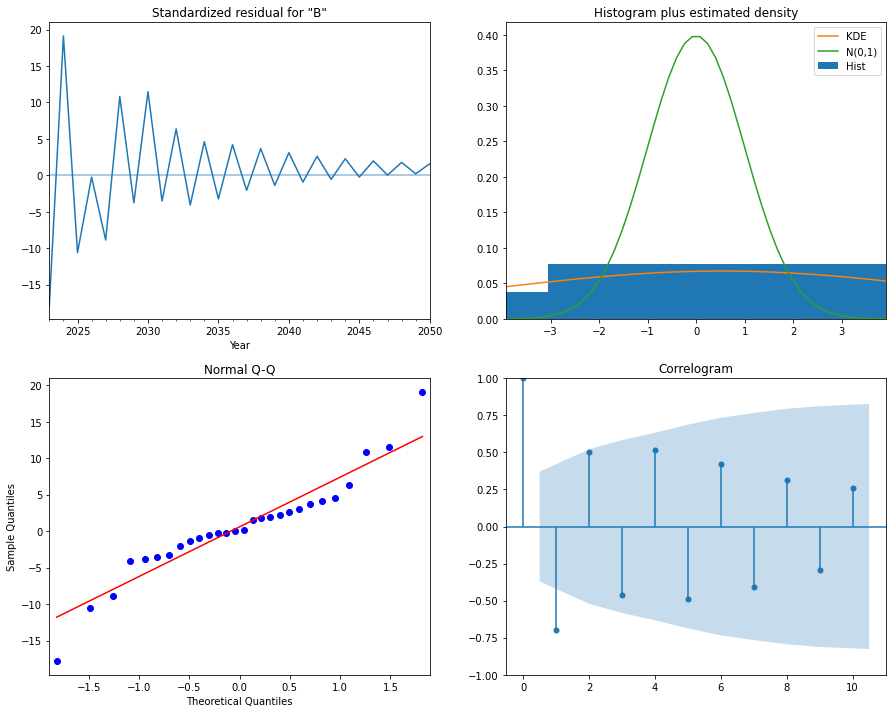

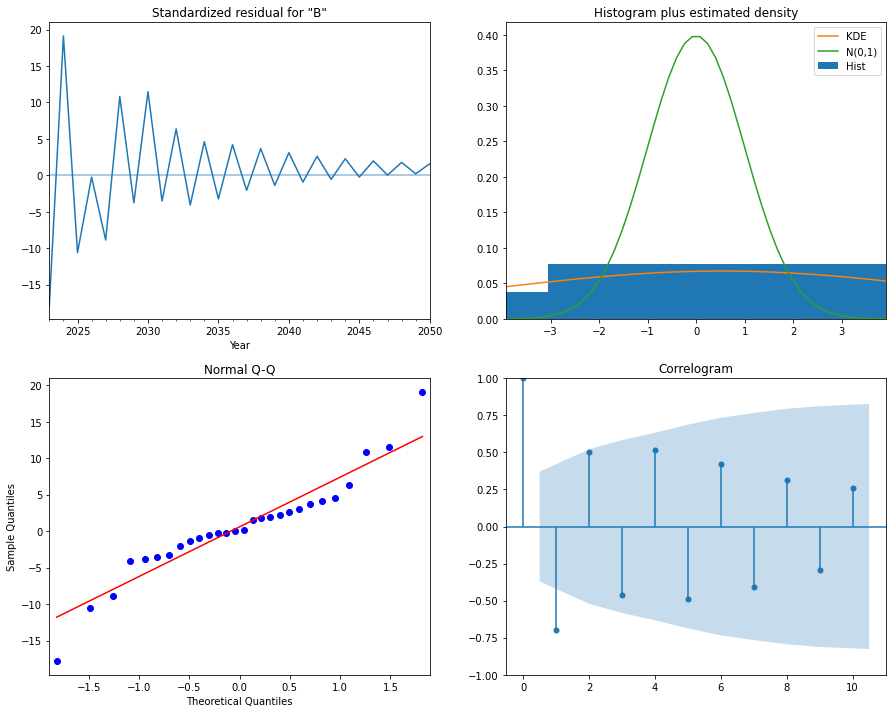

In [44]:
mod = sm.tsa.arima.ARIMA(mte, order=(7,1,1), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

      lower Buildings  upper Buildings
2045      4385.610068      4385.610588
2046      4409.883631      4409.884150
2047      4434.155048      4434.155566
2048      4458.428402      4458.428920
2049      4482.700012      4482.700530
2045    4385.610328
2046    4409.883891
2047    4434.155307
2048    4458.428661
2049    4482.700271
2050    4506.973450
2051    4531.245216
2052    4555.518205
2053    4579.789877
2054    4604.062562
2055    4628.334303
2056    4652.606766
2057    4676.878547
2058    4701.150825
2059    4725.422609
2060    4749.694726
2061    4773.966482
2062    4798.238460
2063    4822.510171
2064    4846.782024
2065    4871.053678
2066    4895.325419
2067    4919.597007
2068    4943.868643
2069    4968.140158
2070    4992.411694
2071    5016.683133
2072    5040.954572
2073    5065.225931
2074    5089.497277
2075    5113.768553
2076    5138.039808
2077    5162.311000
2078    5186.582164
2079    5210.853272
2080    5235.124346
2081    5259.395368
2082    5283.666354
2083  

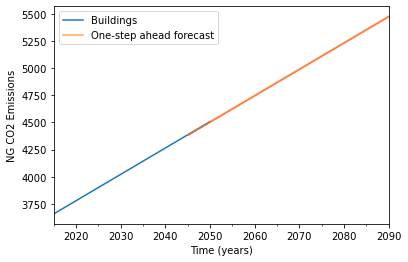

In [45]:
pred = results.get_prediction(start = 30, end = 75, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: nan
2045    4385.610328
2046    4409.883891
2047    4434.155307
2048    4458.428661
2049    4482.700271
2050    4506.973450
2051    4531.245216
2052    4555.518205
2053    4579.789877
2054    4604.062562
2055    4628.334303
2056    4652.606766
2057    4676.878547
2058    4701.150825
2059    4725.422609
2060    4749.694726
2061    4773.966482
2062    4798.238460
2063    4822.510171
2064    4846.782024
2065    4871.053678
2066    4895.325419
2067    4919.597007
2068    4943.868643
2069    4968.140158
2070    4992.411694
2071    5016.683133
2072    5040.954572
2073    5065.225931
2074    5089.497277
2075    5113.768553
2076    5138.039808
2077    5162.311000
2078    5186.582164
2079    5210.853272
2080    5235.124346
2081    5259.395368
2082    5283.666354
2083    5307.937289
2084    5332.208187
2085    5356.479036
2086    5380.749845
2087    5405.020607
2088    5429.291329
2089    5453.5

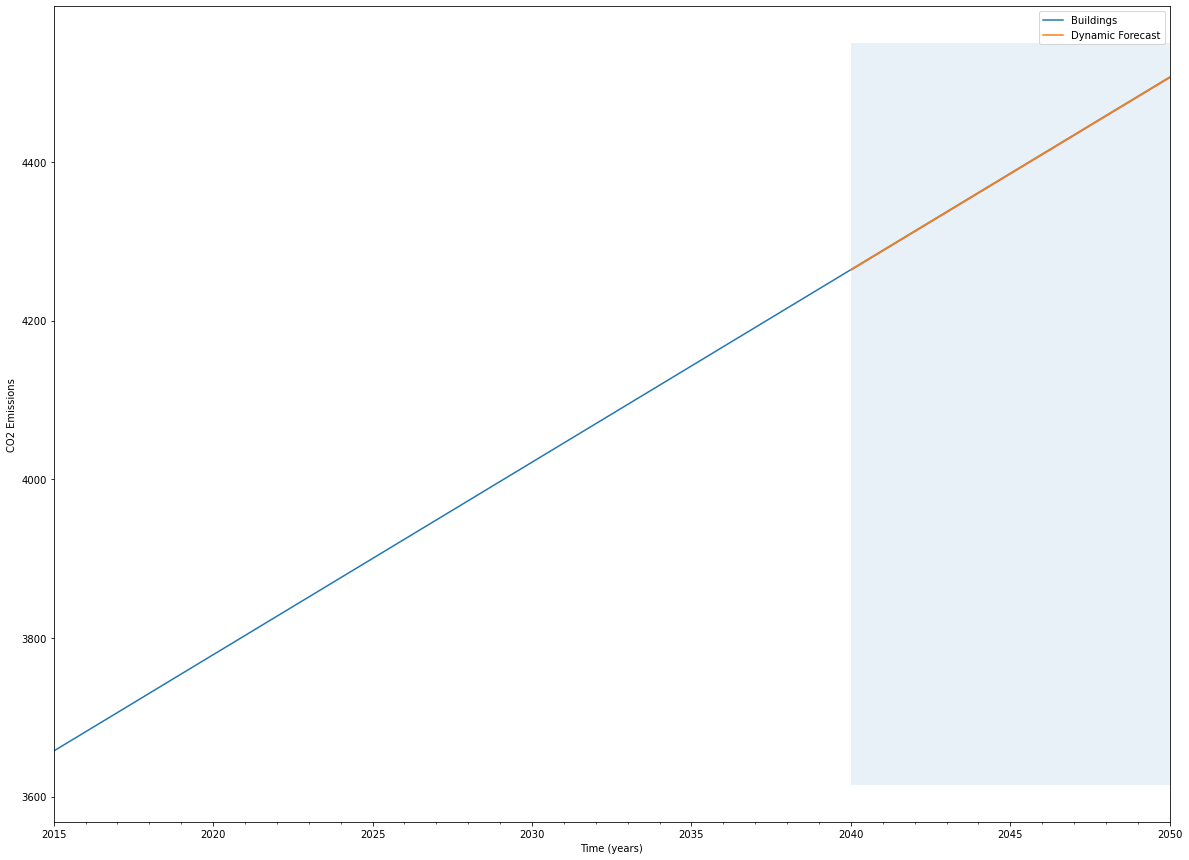

In [46]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2040'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2040'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: 0.0024
      lower Buildings  upper Buildings
2051      4531.244956      4531.245476
2052      4555.517851      4555.518560
2053      4579.789289      4579.790466
2054      4604.061808      4604.063318
2055      4628.333313      4628.335295


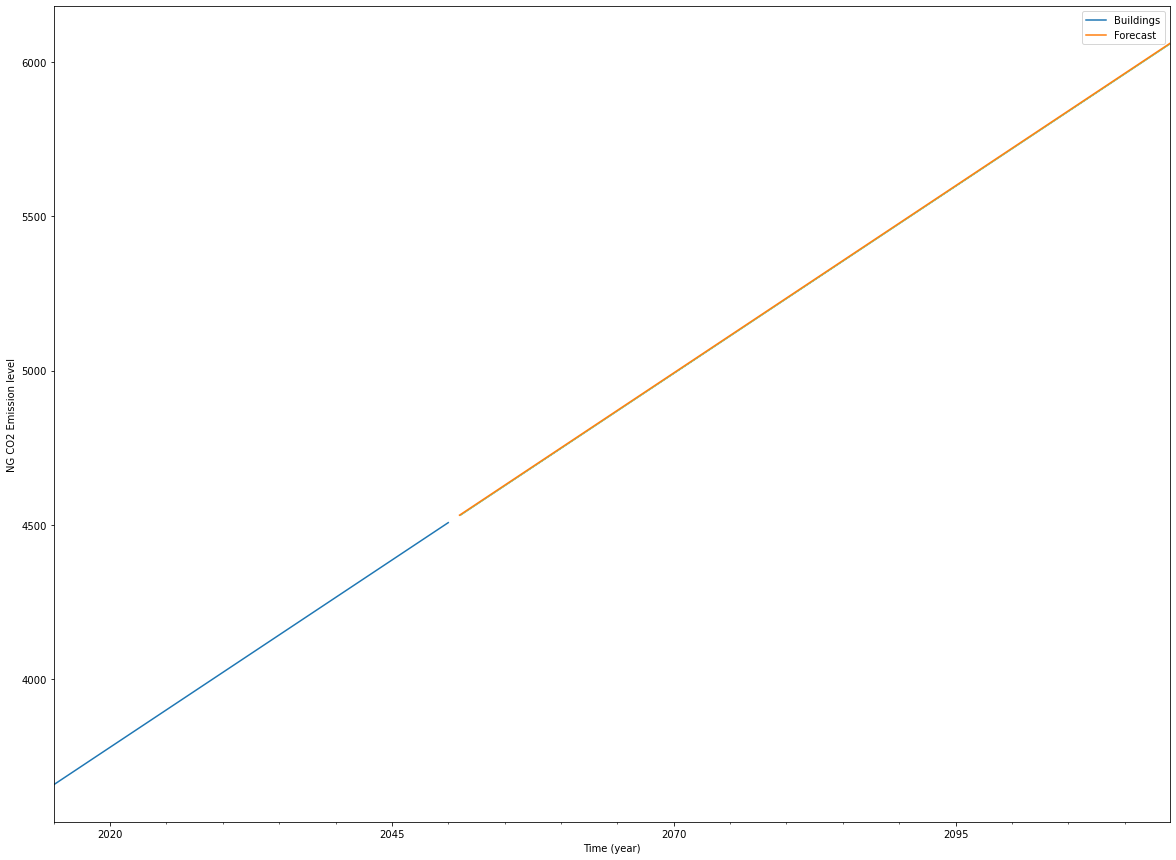

2051    4531.245216
2052    4555.518206
2053    4579.789877
2054    4604.062563
2055    4628.334304
           ...     
2110    5963.236121
2111    5987.505836
2112    6011.775507
2113    6036.045135
2114    6060.314719
Freq: A-DEC, Name: predicted_mean, Length: 64, dtype: float64


In [47]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=64)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)

In [48]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path4, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')

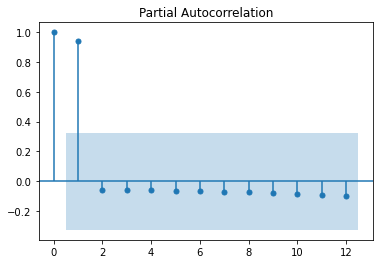

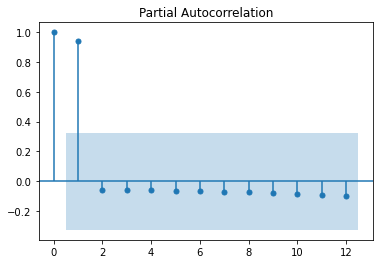

In [49]:
plot_pacf(mte, lags=12)
#q value is 2

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

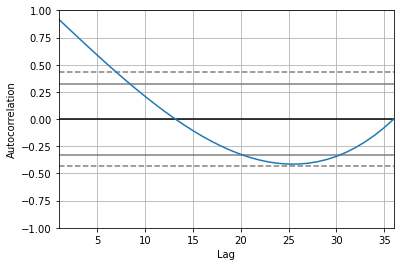

In [50]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be 8 or 9

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   36
Model:                 ARIMA(8, 1, 2)   Log Likelihood                 162.641
Date:                Thu, 02 Dec 2021   AIC                           -303.282
Time:                        15:55:42   BIC                           -289.027
Sample:                    12-31-2015   HQIC                          -299.043
                         - 12-31-2050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1195      0.095      1.263      0.206      -0.066       0.305
ar.L2          0.6175      0.115      5.386      0.000       0.393       0.842
ar.L3         -0.1973      0.058     -3.425      0.0

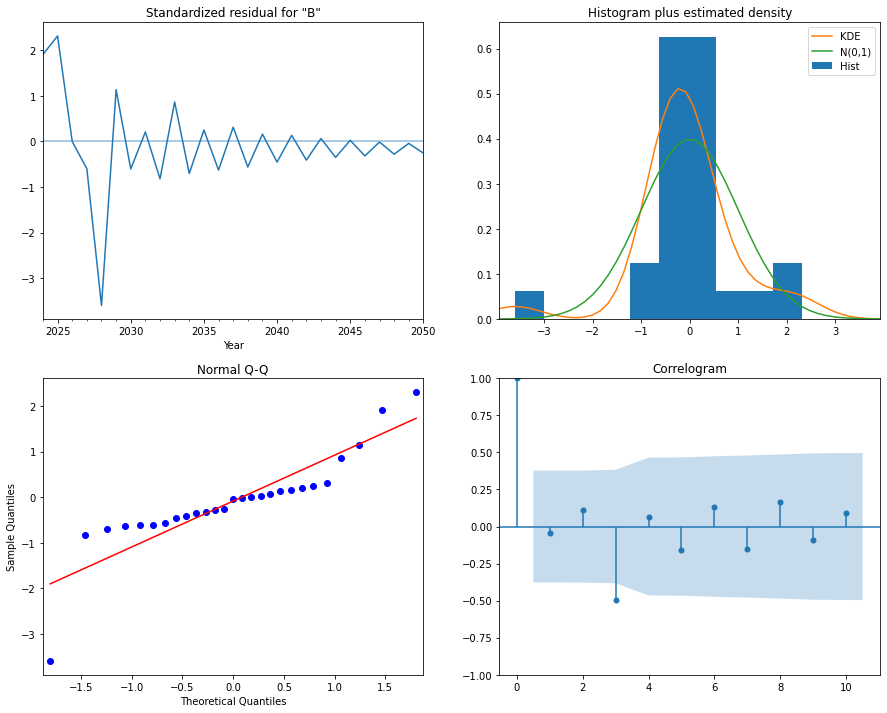

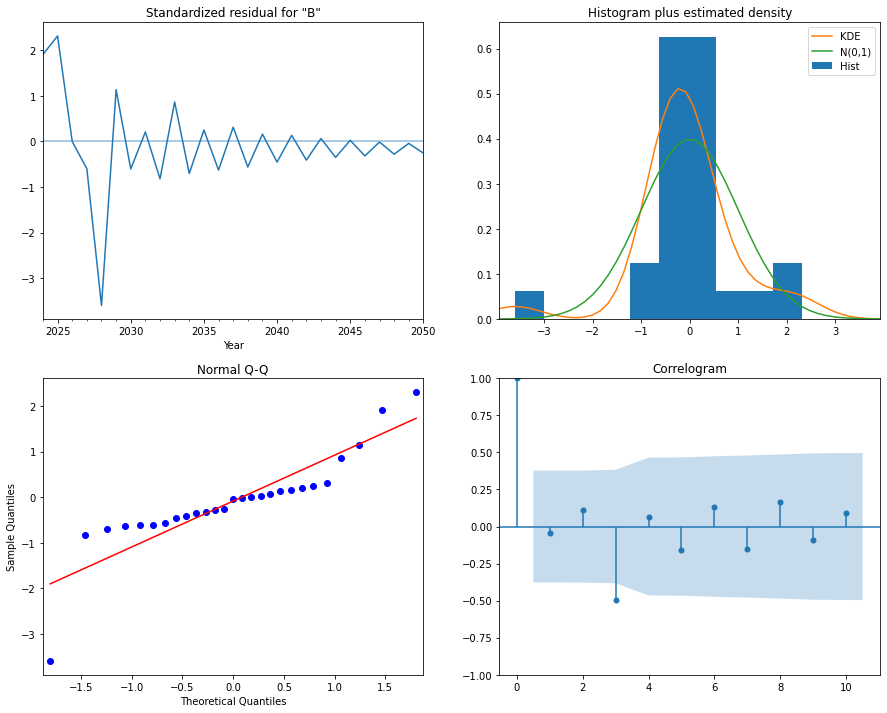

In [54]:
mod = sm.tsa.arima.ARIMA(mte, order=(8,1,2), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

      lower Buildings  upper Buildings
2045      3313.375379      3313.377628
2046      3303.059185      3303.061434
2047      3292.743769      3292.746018
2048      3282.427648      3282.429896
2049      3272.112167      3272.114415
2045    3313.376503
2046    3303.060309
2047    3292.744893
2048    3282.428772
2049    3272.113291
2050    3261.797234
2051    3251.481692
2052    3241.165735
2053    3230.850360
2054    3220.534617
2055    3210.219242
2056    3199.903631
2057    3189.588264
2058    3179.272771
2059    3168.957456
2060    3158.642084
2061    3148.326837
2062    3138.011566
2063    3127.696385
2064    3117.381204
2065    3107.066095
2066    3096.751003
2067    3086.435974
2068    3076.120971
2069    3065.806022
2070    3055.491104
2071    3045.176235
2072    3034.861401
2073    3024.546613
2074    3014.231864
2075    3003.917158
2076    2993.602492
2077    2983.287869
2078    2972.973286
2079    2962.658746
2080    2952.344246
2081    2942.029788
2082    2931.715371
2083  

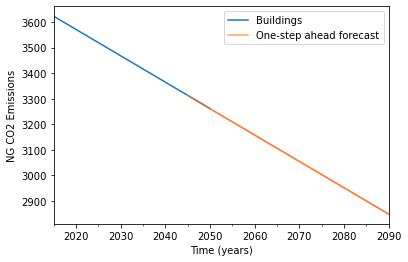

In [55]:
pred = results.get_prediction(start = 30, end = 75, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: nan
2045    3313.376503
2046    3303.060309
2047    3292.744893
2048    3282.428772
2049    3272.113291
2050    3261.797234
2051    3251.481692
2052    3241.165735
2053    3230.850360
2054    3220.534617
2055    3210.219242
2056    3199.903631
2057    3189.588264
2058    3179.272771
2059    3168.957456
2060    3158.642084
2061    3148.326837
2062    3138.011566
2063    3127.696385
2064    3117.381204
2065    3107.066095
2066    3096.751003
2067    3086.435974
2068    3076.120971
2069    3065.806022
2070    3055.491104
2071    3045.176235
2072    3034.861401
2073    3024.546613
2074    3014.231864
2075    3003.917158
2076    2993.602492
2077    2983.287869
2078    2972.973286
2079    2962.658746
2080    2952.344246
2081    2942.029788
2082    2931.715371
2083    2921.400996
2084    2911.086662
2085    2900.772370
2086    2890.458119
2087    2880.143910
2088    2869.829742
2089    2859.5

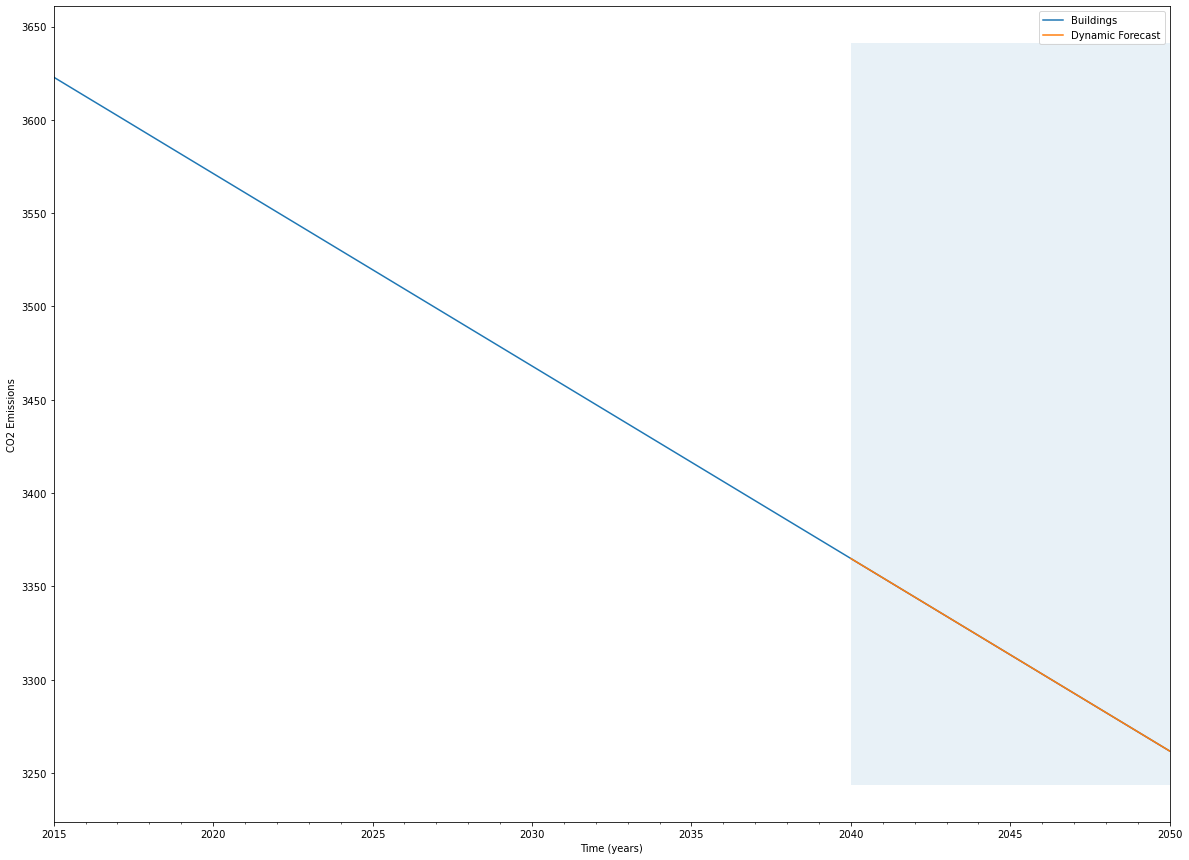

In [56]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2040'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2040'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: 0.0021
      lower Buildings  upper Buildings
2051      3251.480568      3251.482817
2052      3241.163925      3241.167545
2053      3230.847106      3230.853614
2054      3220.530313      3220.538921
2055      3210.213636      3210.224849


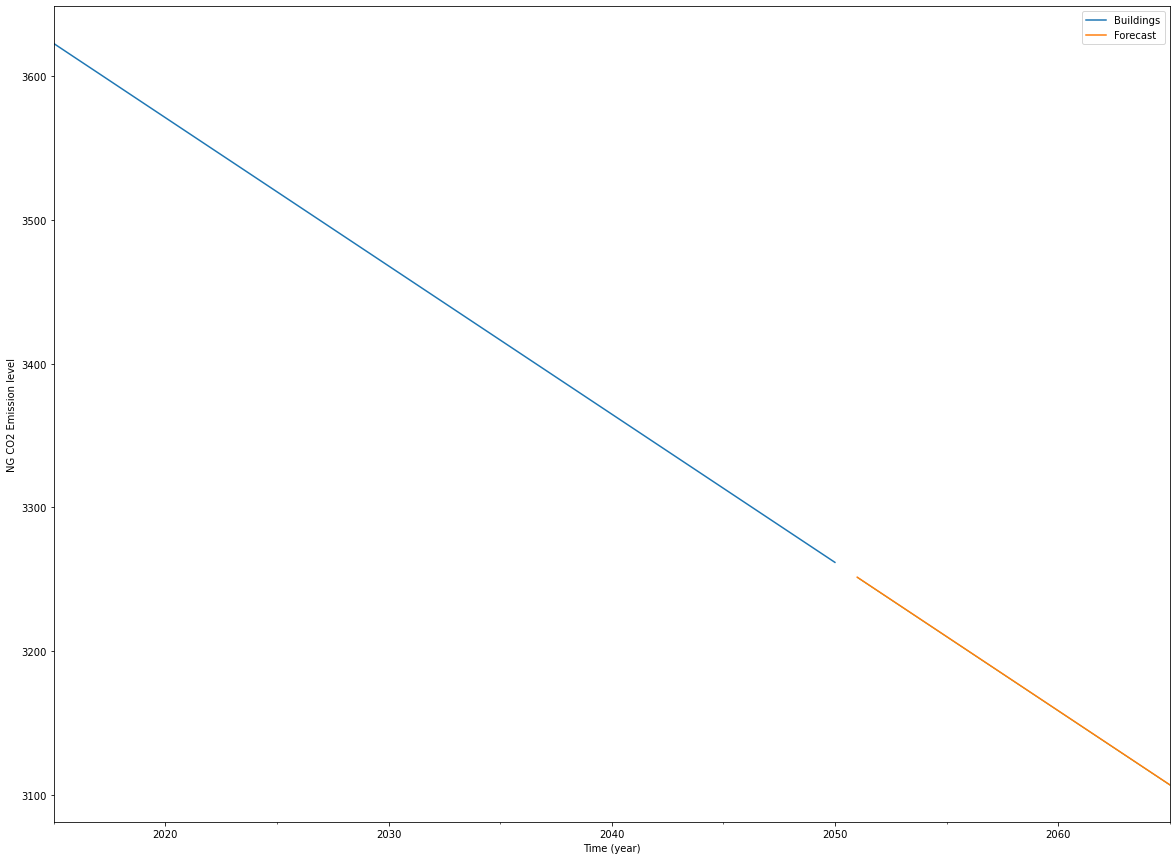

2051    3251.481692
2052    3241.165735
2053    3230.850360
2054    3220.534617
2055    3210.219243
2056    3199.903631
2057    3189.588264
2058    3179.272771
2059    3168.957456
2060    3158.642084
2061    3148.326837
2062    3138.011566
2063    3127.696386
2064    3117.381204
2065    3107.066095
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [60]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=15)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)

In [61]:
dateparse = lambda x: pd.to_datetime(x, format='%Y', errors = 'coerce')
mte = pd.read_csv(path5, parse_dates=['Year'], date_parser=dateparse) 
mte['Year'] = mte['Year'].dt.year
mte.set_index('Year', inplace=True)
mte.index = pd.to_datetime(mte.index, format='%Y', errors = 'coerce')
mte.index = mte.index.to_period('Y')

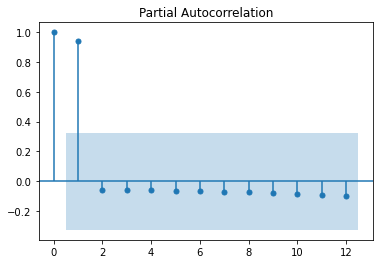

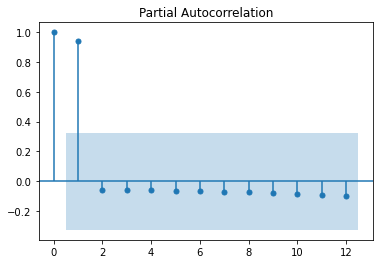

In [62]:
plot_pacf(mte, lags=12)
#q value is 2

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

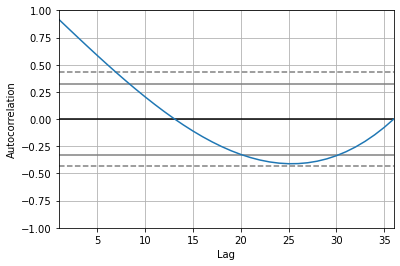

In [63]:
#identifying the parameters

autocorrelation_plot(mte)

#p value can be 6 or 7

                               SARIMAX Results                                
Dep. Variable:              Buildings   No. Observations:                   36
Model:                 ARIMA(6, 1, 2)   Log Likelihood                  85.345
Date:                Thu, 02 Dec 2021   AIC                           -152.690
Time:                        16:07:54   BIC                           -140.384
Sample:                    12-31-2015   HQIC                          -148.836
                         - 12-31-2050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7697      1.322      0.582      0.560      -1.821       3.361
ar.L2          0.5424      1.074      0.505      0.613      -1.562       2.647
ar.L3          0.0926      1.062      0.087      0.9

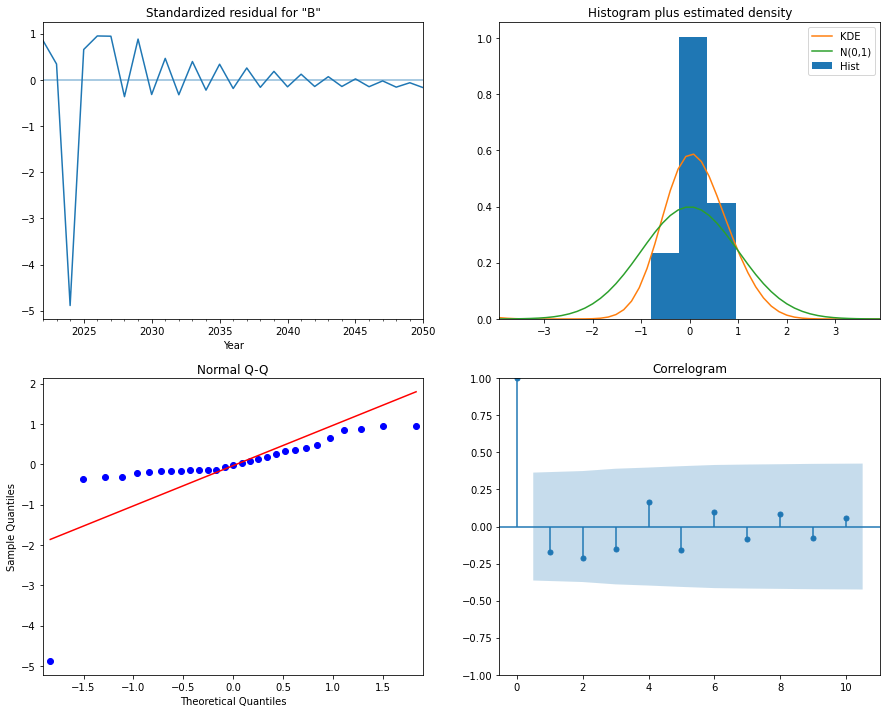

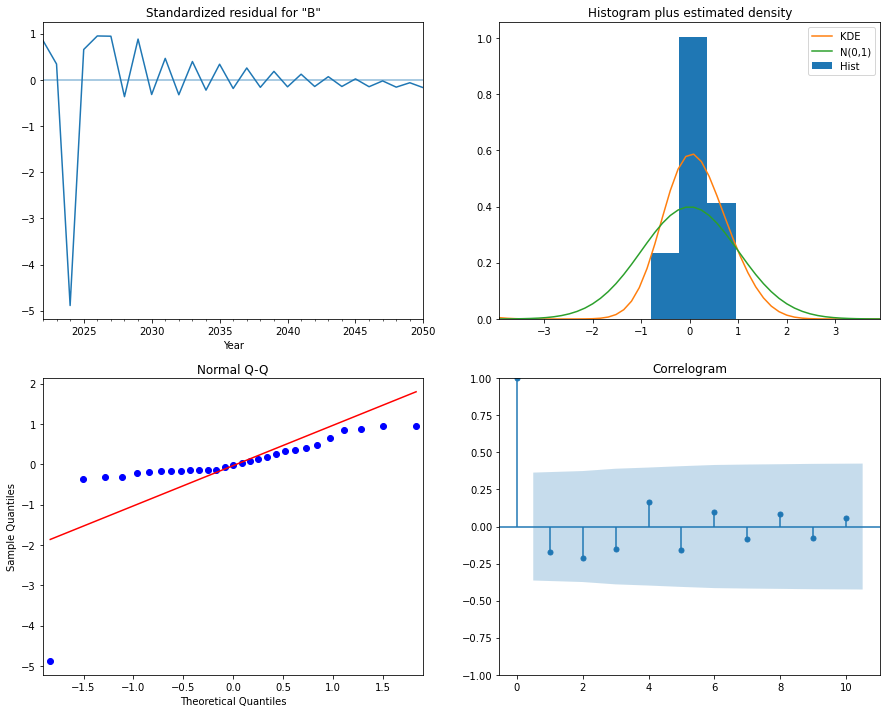

In [64]:
mod = sm.tsa.arima.ARIMA(mte, order=(6,1,2), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

results.plot_diagnostics(figsize=(15, 12))

      lower Buildings  upper Buildings
2045      2469.672657      2469.722502
2046      2444.763035      2444.812880
2047      2420.642651      2420.692496
2048      2397.310756      2397.360602
2049      2374.768060      2374.817905
2045    2469.697580
2046    2444.787957
2047    2420.667573
2048    2397.335679
2049    2374.792982
2050    2353.038817
2051    2332.073807
2052    2311.899601
2053    2292.518294
2054    2273.928126
2055    2256.132165
2056    2239.129612
2057    2222.922849
2058    2207.511973
2059    2192.898917
2060    2179.084258
2061    2166.069779
2062    2153.856437
2063    2142.445921
2064    2131.839462
2065    2122.038771
2066    2113.045290
2067    2104.860779
2068    2097.486866
2069    2090.925397
2070    2085.178157
2071    2080.247094
2072    2076.134146
2073    2072.841371
2074    2070.370849
2075    2068.724761
2076    2067.905326
2077    2067.914850
2078    2068.755690
2079    2070.430282
2080    2072.941119
Freq: A-DEC, Name: predicted_mean, dtype: floa

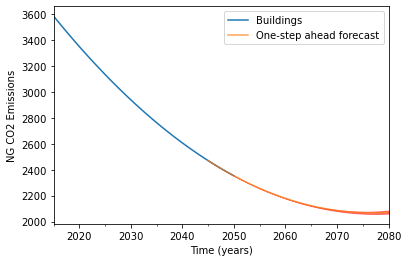

In [68]:
pred = results.get_prediction(start = 30, end = 65, dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci.head())

ax = mte['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()
print(pred.predicted_mean)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: nan
2045    2469.697580
2046    2444.787957
2047    2420.667573
2048    2397.335679
2049    2374.792982
2050    2353.038817
2051    2332.073807
2052    2311.899601
2053    2292.518294
2054    2273.928126
2055    2256.132165
2056    2239.129612
2057    2222.922849
2058    2207.511973
2059    2192.898917
2060    2179.084258
2061    2166.069779
2062    2153.856437
2063    2142.445921
2064    2131.839462
2065    2122.038771
2066    2113.045290
2067    2104.860779
2068    2097.486866
2069    2090.925397
2070    2085.178157
2071    2080.247094
2072    2076.134146
2073    2072.841371
2074    2070.370849
2075    2068.724761
2076    2067.905326
2077    2067.914850
2078    2068.755690
2079    2070.430282
2080    2072.941119
2081    2076.290771
2082    2080.481868
2083    2085.517115
2084    2091.399281
2085    2098.131206
2086    2105.715801
2087    2114.156045
2088    2123.454988
2089    2133.6

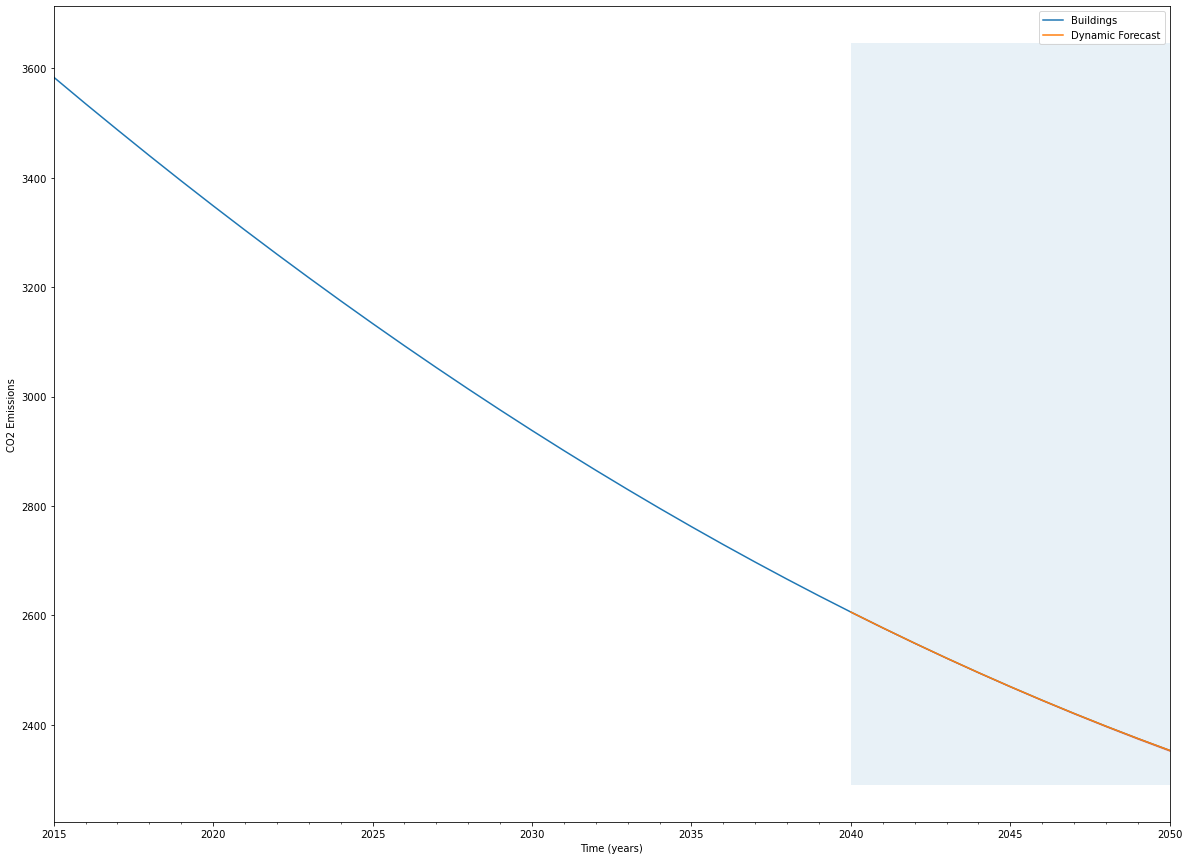

In [66]:
mte_forecast = pred.predicted_mean
mte_truth = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth['Buildings'])**2)/len(mte_forecast))))
      
pred_dynamic = results.get_prediction(start=pd.to_datetime('2040'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = mte['2015':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2040'), 
                 mte.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
print(mte_forecast)

The Mean Squared Error (MSE) of the forecast is 0.0
The Root Mean Square Error (RMSE) of the forcast: 0.0374
      lower Buildings  upper Buildings
2051      2332.048884      2332.098729
2052      2311.849388      2311.949814
2053      2292.423767      2292.612821
2054      2273.774883      2274.081369
2055      2255.899682      2256.364649


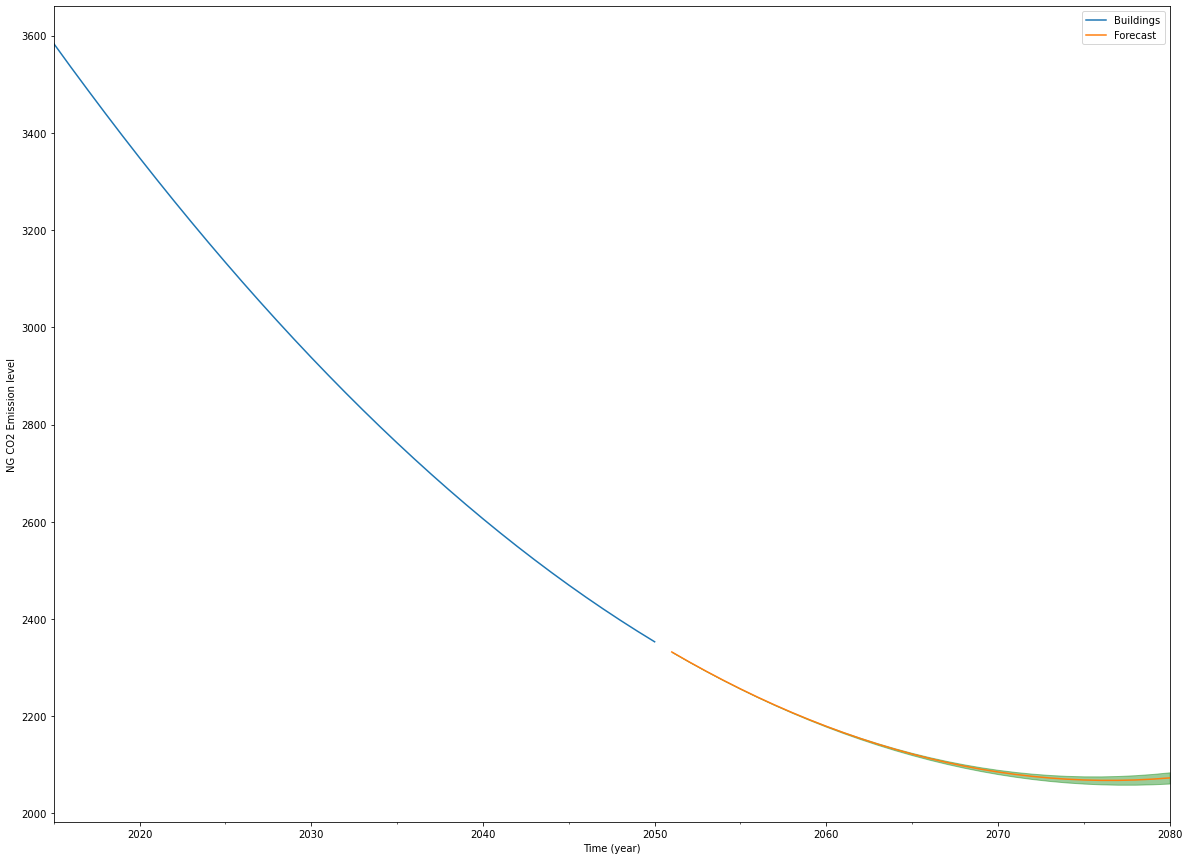

2051    2332.073807
2052    2311.899601
2053    2292.518294
2054    2273.928126
2055    2256.132165
2056    2239.129612
2057    2222.922849
2058    2207.511973
2059    2192.898917
2060    2179.084258
2061    2166.069779
2062    2153.856437
2063    2142.445921
2064    2131.839462
2065    2122.038771
2066    2113.045290
2067    2104.860779
2068    2097.486866
2069    2090.925397
2070    2085.178157
2071    2080.247094
2072    2076.134146
2073    2072.841371
2074    2070.370849
2075    2068.724761
2076    2067.905326
2077    2067.914850
2078    2068.755690
2079    2070.430282
2080    2072.941119
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [70]:
# Extract the predicted and true values of our time series
mte_forecast = pred_dynamic.predicted_mean
mte_orginal = mte['2040':]

# Compute the mean square error
mse = ((mte_forecast - mte_orginal['Buildings']) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_orginal['Buildings'])**2)/len(mte_forecast))))
      
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=30)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
print(forecast_ci.head())

ax = mte.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()
print(forecast.predicted_mean)